<a href="https://colab.research.google.com/github/ingridmidory/Machine-Learning-with-Python-/blob/main/mtacars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cargar librerias


Empezamos importando las librerias que vamos a usar.

In [ ]:
import statistics
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns

Ahora, cargamos los datos a nuestro notebook.

In [ ]:
df_ad = pd.read_csv("/content/mtcars.csv") #dataframe_ad
df_ad.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 2.9 KB


Para entender la tabla de arriba, se buscaron los significados de cada columna:

1. mpg: Millas por galón (consumo de combustible)
2. cyl: Número de cilindros
3. disp: Desplazamiento del motor (en pulgadas cúbicas)
4. hp: Caballos de fuerza (horsepower)
5. drat: Relación del eje trasero
6. wt: Peso del auto
7. qsec: Tiempo de aceleración de 1/4 de milla
8. vs: Motor (0 = V-shaped, 1 = straight)
9. am: Transmisión (0 = automático, 1 = manual)
10. gear: Número de marchas
11. carb: Número de carburadores

# Analyzing Data

Ahora, definimos el nombre de las columnas de la tabla con la que trabajaremos.

In [ ]:
col = ['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']
df_ad = df_ad[col]
df_ad

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


from matplotlib import pyplot as plt
df_ad['mpg'].plot(kind='hist', bins=20, title='mpg')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_ad['cyl'].plot(kind='hist', bins=20, title='cyl')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_ad['disp'].plot(kind='hist', bins=20, title='disp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_ad['hp'].plot(kind='hist', bins=20, title='hp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_ad.plot(kind='scatter', x='mpg', y='cyl', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_ad.plot(kind='scatter', x='cyl', y='disp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_ad.plot(kind='scatter', x='disp', y='hp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_ad.plot(kind='scatter', x='hp', y='drat', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_ad['mpg'].plot(kind='line', figsize=(8, 4), title='mpg')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_ad['cyl'].plot(kind='line', figsize=(8, 4), title='cyl')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_ad['disp'].plot(kind='line', figsize=(8, 4), title='disp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_ad['hp'].plot(kind='line', figsize=(8, 4), title='hp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['mpg'].plot(kind='hist', bins=20, title='mpg')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['cyl'].plot(kind='hist', bins=20, title='cyl')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['disp'].plot(kind='hist', bins=20, title='disp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='mpg', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='mpg', y='cyl', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='cyl', y='disp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='disp', y='hp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['mpg']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('mpg')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['cyl']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('cyl')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['disp']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('disp')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['hp']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('hp')

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['mpg'].plot(kind='line', figsize=(8, 4), title='mpg')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['cyl'].plot(kind='line', figsize=(8, 4), title='cyl')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['disp'].plot(kind='line', figsize=(8, 4), title='disp')
plt.gca().spines[['top', 'right']].set_visible(False)

<function matplotlib.pyplot.show(close=None, block=None)>

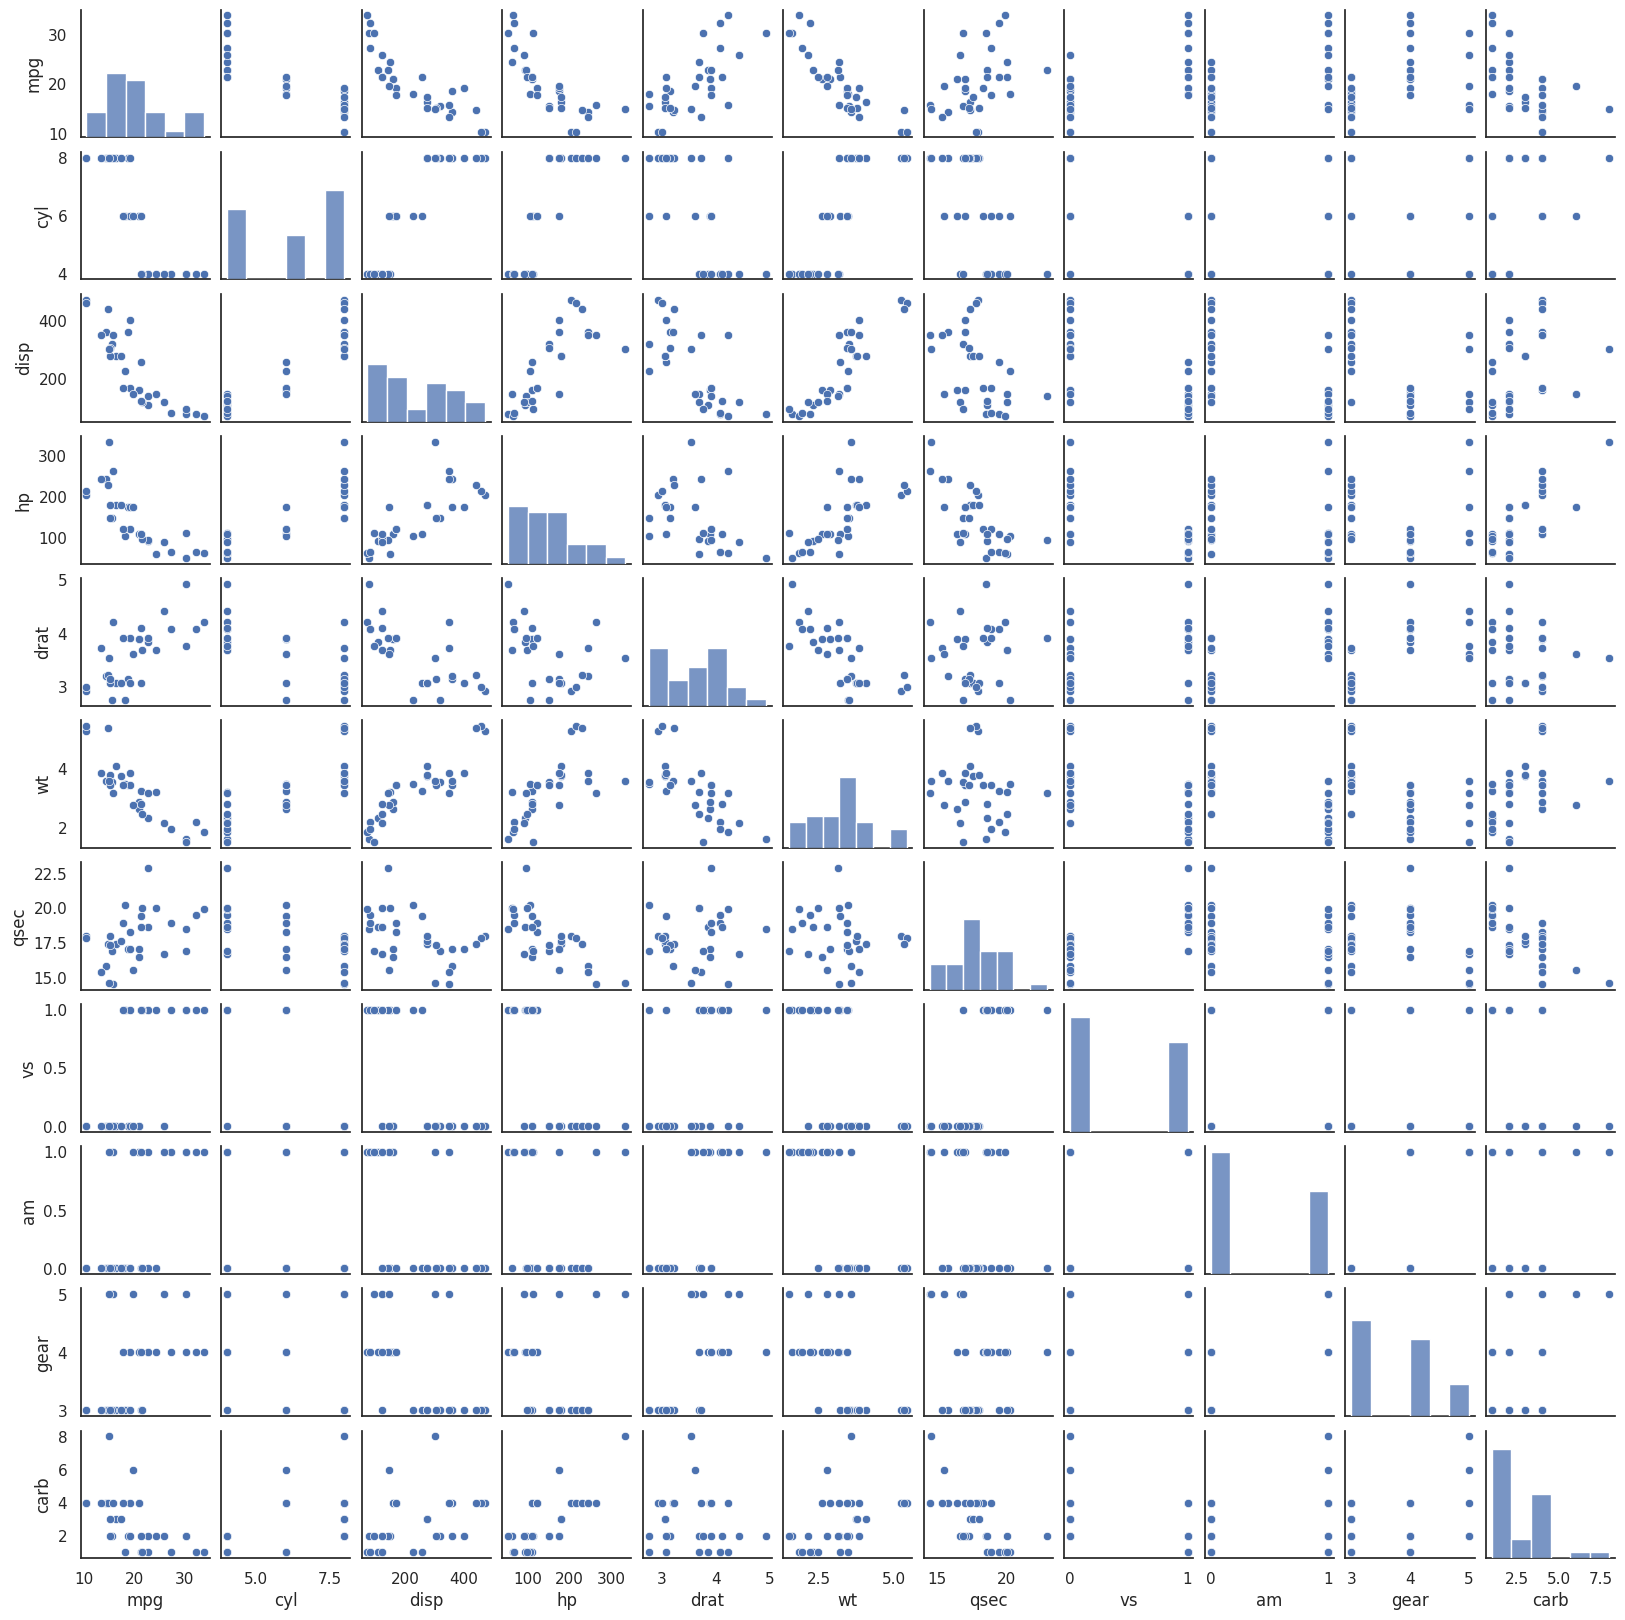

In [ ]:
import seaborn as sns
sns.set(style = 'white', context = 'notebook')
sns.pairplot(df_ad, height = 1.5)
plt.show

# Heat Map

<Axes: >

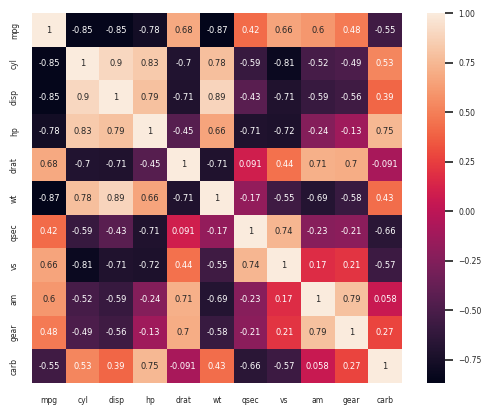

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

# Select only the numeric columns
numeric_df = df_ad.select_dtypes(include=[np.number])

cm = np.corrcoef(numeric_df.values.T)
sns.set(font_scale=0.5)
sns.heatmap(cm, cbar=True, annot=True, square=True,
            yticklabels=numeric_df.columns,
            xticklabels=numeric_df.columns)

Se buscan celdas con colores extremos (muy claros o muy oscuros), ya que indican fuertes correlaciones, ya sean positivas o negativas.

Por ejemplo, mpg tiene una correlación negativa alta con wt (-0.87) y hp (-0.78), lo que significa que a medida que el peso o la potencia del motor aumentan, el consumo de combustible (millas por galón) disminuye. cyl y disp tienen una alta correlación positiva (0.9), indicando que a mayor número de cilindros, mayor es la capacidad del motor.

hp y wt tienen una correlación positiva moderada (0.66), sugiriendo que vehículos más pesados tienden a tener motores más potentes.

am (tipo de transmisión) y gear (número de marchas) tienen una correlación moderada (0.79), indicando que el tipo de transmisión puede estar relacionado con el número de marchas del vehículo.

# Correlation Matrix

In [ ]:
import numpy as np
import pandas as pd

# Select only the numeric columns
numeric_df = df_ad.select_dtypes(include=[np.number])

# Calculate the correlation matrix on the numeric DataFrame
np.corrcoef(numeric_df.values.T) #matriz de coeficientes de correlacion

array([[ 1.        , -0.85216196, -0.84755138, -0.77616837,  0.68117191,
        -0.86765938,  0.41868403,  0.66403892,  0.59983243,  0.48028476,
        -0.55092507],
       [-0.85216196,  1.        ,  0.90203287,  0.83244745, -0.69993811,
         0.78249579, -0.59124207, -0.8108118 , -0.52260705, -0.4926866 ,
         0.52698829],
       [-0.84755138,  0.90203287,  1.        ,  0.79094859, -0.71021393,
         0.88797992, -0.43369788, -0.71041589, -0.59122704, -0.5555692 ,
         0.39497686],
       [-0.77616837,  0.83244745,  0.79094859,  1.        , -0.44875912,
         0.65874789, -0.70822339, -0.72309674, -0.24320426, -0.12570426,
         0.74981247],
       [ 0.68117191, -0.69993811, -0.71021393, -0.44875912,  1.        ,
        -0.71244065,  0.09120476,  0.44027846,  0.71271113,  0.69961013,
        -0.0907898 ],
       [-0.86765938,  0.78249579,  0.88797992,  0.65874789, -0.71244065,
         1.        , -0.17471588, -0.55491568, -0.69249526, -0.583287  ,
         0.427

A continuación, se detallan las correlaciones más importantes:

1. mpg (millas por galón):

* Fuerte correlación negativa con cyl (-0.85), disp (-0.85), hp (-0.78), y wt (-0.87). Esto indica que a mayor número de cilindros, mayor desplazamiento del motor, mayor potencia y mayor peso, menor es la eficiencia en el consumo de combustible.
* Correlación positiva con drat (0.68), qsec (0.42), vs (0.66), y am (0.60). Esto sugiere que una mayor relación de transmisión, mayor tiempo en el cuarto de milla, motores en línea y transmisiones automáticas están asociados con una mayor eficiencia en el consumo de combustible.

2. cyl (número de cilindros):

* Fuerte correlación positiva con disp (0.90), hp (0.83), y wt (0.78). Esto indica que un mayor número de cilindros está asociado con un mayor desplazamiento del motor, mayor potencia y mayor peso.

3. disp (desplazamiento del motor):

* Fuerte correlación positiva con hp (0.79) y wt (0.89). Similar a cyl, un mayor desplazamiento del motor está asociado con una mayor potencia y mayor peso.

4. hp (potencia del motor):

* Fuerte correlación negativa con qsec (-0.71) y vs (-0.72). Esto indica que a mayor potencia del motor, menor es el tiempo en el cuarto de milla y menor es la probabilidad de que el motor sea en línea.

5. drat (relación de transmisión):

* Correlación positiva con mpg (0.68), qsec (0.09), y gear (0.70). Esto sugiere que una mayor relación de transmisión está asociada con una mayor eficiencia en el consumo de combustible y más marchas.

6. wt (peso):

* Fuerte correlación negativa con mpg (-0.87). Esto indica que a mayor peso del vehículo, menor es la eficiencia en el consumo de combustible.

7. qsec (tiempo en el cuarto de milla):

* Correlación positiva con vs (0.74). Esto sugiere que un mayor tiempo en el cuarto de milla está asociado con motores en línea.

8. vs (tipo de motor: 0 = V, 1 = línea):

* Correlación positiva con mpg (0.66) y qsec (0.74). Esto indica que los motores en línea están asociados con una mayor eficiencia en el consumo de combustible y mayor tiempo en el cuarto de milla.

9. am (tipo de transmisión: 0 = automática, 1 = manual):

* Correlación positiva con mpg (0.60), drat (0.71), y gear (0.79). Esto sugiere que las transmisiones manuales están asociadas con una mayor eficiencia en el consumo de combustible, mayor relación de transmisión y más marchas.

10. gear (número de marchas):

* Correlación positiva con mpg (0.48), drat (0.70), y am (0.79). Esto sugiere que los vehículos con más marchas tienden a tener una mayor eficiencia en el consumo de combustible y una mayor relación de transmisión.

11. carb (número de carburadores):
* Correlación positiva con hp (0.75) y wt (0.43). Esto indica que los vehículos con más carburadores tienden a tener mayor potencia y mayor peso.

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

Con ayuda del análisis anterior, podemos definir las variables que deseamos comparar para nuestro modelo de regresion lineal. Tomaremos las que se relacionan de una manera fuertmente positiva, que son hp y wt

In [ ]:
x = np.array (df_ad[['hp']])
y = np.array (df_ad['wt'])

In [ ]:
x

array([[110],
       [110],
       [ 93],
       [110],
       [175],
       [105],
       [245],
       [ 62],
       [ 95],
       [123],
       [123],
       [180],
       [180],
       [180],
       [205],
       [215],
       [230],
       [ 66],
       [ 52],
       [ 65],
       [ 97],
       [150],
       [150],
       [245],
       [175],
       [ 66],
       [ 91],
       [113],
       [264],
       [175],
       [335],
       [109]])

# Getting the Linear Model

In [ ]:
lm_fit = LinearRegression() #llamar la clase de regresión lineal
lm_fit.fit(x,y) #entrenar el modelo

LinearRegression()

In [ ]:
print(f" intercept:{lm_fit.intercept_} \n R^2 : {lm_fit.score(x,y)}") #pendiente de la recta e interseccion con el eje x

 intercept:1.8382467029502974 
 R^2 : 0.43394877908118334


R^2 de aproximadamente 0.434 indica que el 43.4% de la variabilidad en la variable dependiente (por ejemplo, mpg) puede ser explicada por las variables independientes del modelo. Esto sugiere que hay otros factores no incluidos en el modelo que también influyen significativamente en la variable dependiente.

In [ ]:
import statsmodels.api as sm #statsmodels es una biblioteca de python que proporciona clases y funciones para la estimacipon de muchos modelos diferentes, asó como para a realización de pruebas estadísticas y la exloración de datos

lm_fit_OLS = sm.OLS(y, x).fit () #model definition
print(lm_fit_OLS.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.734
Model:                            OLS   Adj. R-squared (uncentered):              0.725
Method:                 Least Squares   F-statistic:                              85.45
Date:                Wed, 03 Jul 2024   Prob (F-statistic):                    2.02e-10
Time:                        19:09:13   Log-Likelihood:                         -83.793
No. Observations:                  32   AIC:                                      169.6
Df Residuals:                      31   BIC:                                      171.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
print (f" hp ={lm_fit.intercept_} + {lm_fit.coef_} wt") # Use lm_fit.coef_ to get the coefficients

 hp =1.8382467029502974 + [0.00940096] wt


El coeficiente R^2 de 0.43 indica que aproximadamente el 43.4% de la variabilidad en hp puede ser explicada por wt en este modelo lineal simple. Esto sugiere que aunque el peso del vehículo tiene una influencia en la potencia del motor, hay otros factores importantes que también afectan la potencia y no están incluidos en este modelo.

Ahora vamos a predecir valores; es decir, poner a pruebas el modelo que ya hicimos:

In [ ]:
value = 300
hp_value = np.array([[value]])
lm_fit.predict(hp_value)

array([4.65853466])

La predicción del modelo indica que para un peso (wt) de 300 unidades, la potencia del motor (hp) se espera que sea aproximadamente 4.66 unidades.

Ahora, agregamos una  columna llamada 'predicted' a un DataFrame df_ad, donde se almacenan las predicciones realizadas por tu modelo de regresión lineal (lm_fit) para cada fila de datos representada por el conjunto de características x.

In [ ]:
df_ad['predicted'] = lm_fit.predict(x)
df_ad

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,predicted
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,2.872352
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,2.872352
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,2.712536
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,2.872352
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,3.483415
5,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,2.825347
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,4.141482
7,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,2.421106
8,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,2.731338
9,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,2.994565


Agregamos una columna a la tabla llamada "predicted" que me ayuda a predecir los valores. Esto nos ayuda a mantener la informacion en una sola tabla.

In [ ]:
df_ad['residuals']=df_ad['hp']-df_ad['predicted'] #creando una nueva columna en el dataframe

mse = np.mean(df_ad['residuals']**2)
rmse = np.sqrt(mse)

n= len(df_ad)
p=1
rse = rmse * np.sqrt((n)/(n-p-1))

print(f"MSE: {mse}")

MSE: 25052.45666807685


In [ ]:
def RSE (y_true, y_predicted):

  y_true = np.array(y_true)
  y_predicted = np.array(y_predicted)
  RSS=np.sum(np.square(y_true-y_predicted))

  rse= math.sqrt(RSS/ (len(y_true)-2))

  return rse

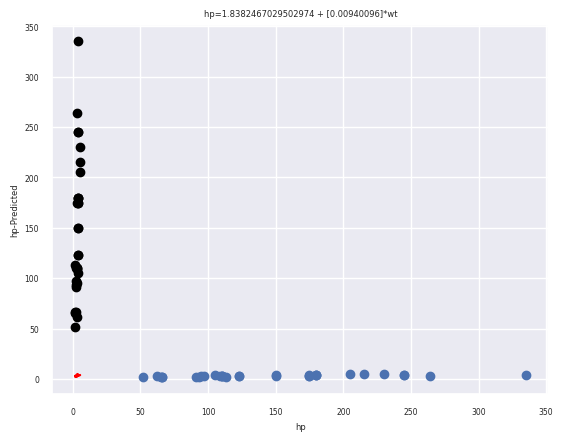

In [ ]:
plt.scatter(df_ad['wt'], df_ad['hp'], color='black') #de dispersion
plt.plot(df_ad['wt'], df_ad['predicted'], color='red') #lineal

plt.title (f"hp={lm_fit.intercept_} + {lm_fit.coef_}*wt") #titulo de la grafica
plt.xlabel("hp")
plt.ylabel("hp-Predicted")
plt.scatter(x,y)
plt.show()

Los puntos de datos reales (hp) están bastante dispersos y no muestran una relación lineal clara con el peso (wt).

La mayoría de los valores predichos (hp-Predicted) están muy cerca de cero, lo que sugiere que el modelo no está capturando adecuadamente la relación entre hp y wt.

El valor R^2 mencionado antes es 0.4339, lo que indica que solo el 43.4% de la variabilidad en hp se explica por wt. Esto refuerza la idea de que la relación lineal entre estas variables no es fuerte.

# Agregando una variable

In [ ]:
yy = df_ad[['hp', 'cyl']].values  # Select multiple columns and convert to NumPy array
z = df_ad['am'].values
lm_fit = LinearRegression()
lm_fit.fit(yy, z)

LinearRegression()

In [ ]:
print(f" intercept:{lm_fit.intercept_} \n R^2 : {lm_fit.score(yy,z)}")

 intercept:1.5418959332526323 
 R^2 : 0.3929823678432116


  feature        VIF
0      hp  16.430788
1     cyl  16.482710
2      am   1.344008


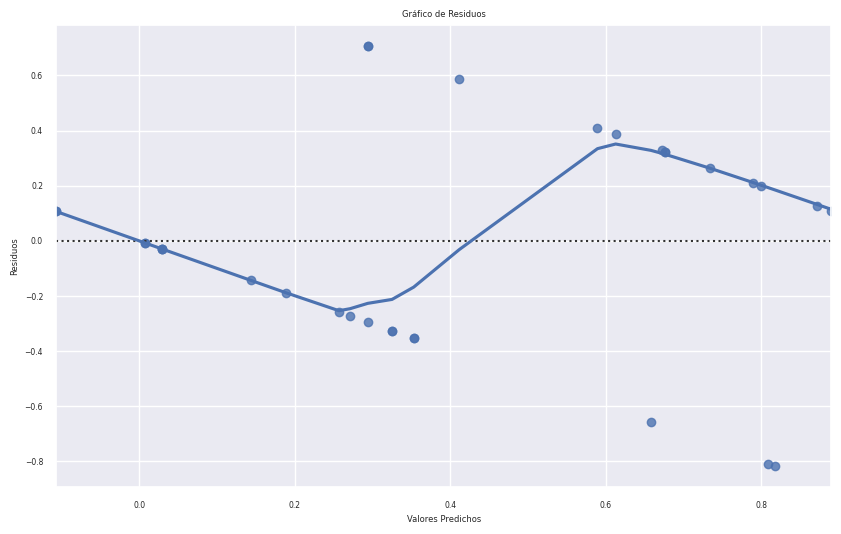

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Assuming df_ad is your original DataFrame
variables = ['hp', 'cyl', 'am']
X = df_ad[variables]

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

# Analizar residuos
# Use both features for prediction, as the model was trained on two
z_pred = lm_fit.predict(yy)  # Predicting using both 'hp' and 'cyl'
residuos = z - z_pred

# Gráfico de residuos
plt.figure(figsize=(10, 6))
sns.residplot(x=z_pred, y=residuos, lowess=True)
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos')
plt.show()

La gráfica muestra un patrón curvilíneo en los residuos, lo que puede indicar que el modelo no captura bien la relación no lineal en los datos.
Los residuos no están distribuidos aleatoriamente alrededor de la línea horizontal (residuo = 0), lo que sugiere problemas de especificación del modelo o una estructura no capturada por el modelo.

Hay una concentración de puntos alrededor del centro, pero algunos puntos están alejados, indicando posibles outliers o valores atípicos.


# Conclusión

El gráfico de residuos muestra que hay un patrón en los residuos, lo que sugiere que el modelo de regresión podría no ser el más adecuado para los datos. Los altos valores de VIF para hp y cyl indican que puede haber un problema de multicolinealidad que podría estar afectando los resultados del modelo.

# Regresión Polinómica

R^2 (Polinómico): 0.44258279869956185
MSE (Polinómico): 0.1344551257043049


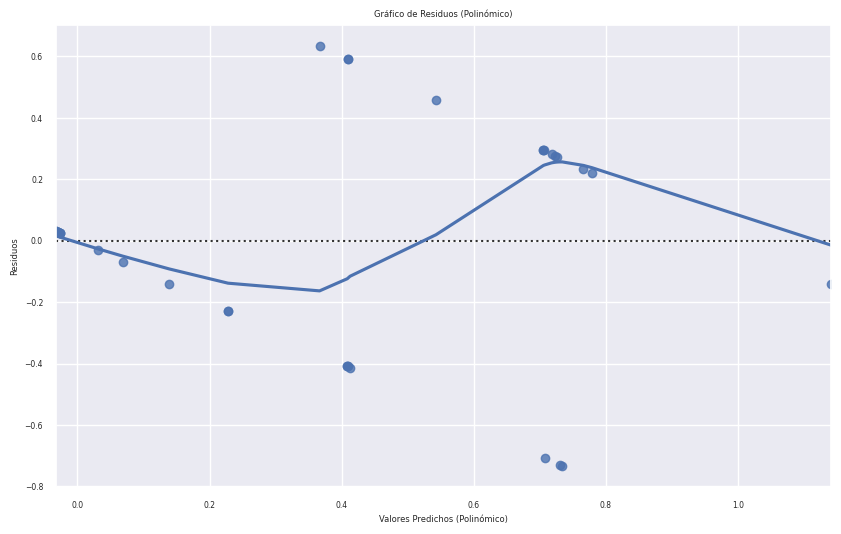

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Crear un pipeline para la regresión polinómica
poly = PolynomialFeatures(degree=2)
poly_reg = make_pipeline(poly, LinearRegression())

# Ajustar el modelo
poly_reg.fit(yy, z)

# Predicciones
z_pred_poly = poly_reg.predict(yy)

# Evaluar el modelo
r2_poly = poly_reg.score(yy, z)
mse_poly = np.mean((z - z_pred_poly) ** 2)

print(f'R^2 (Polinómico): {r2_poly}')
print(f'MSE (Polinómico): {mse_poly}')

# Graficar residuos
residuos_poly = z - z_pred_poly
plt.figure(figsize=(10, 6))
sns.residplot(x=z_pred_poly, y=residuos_poly, lowess=True)
plt.xlabel('Valores Predichos (Polinómico)')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos (Polinómico)')
plt.show()